# pandas
pandas contains data structures and data manipulation tools designed to make data cleaning
and analysis fast and convenient in Python. pandas is often used in tandem with
numerical computing tools like NumPy and SciPy, analytical libraries like statsmodels and scikit-learn, and data visualization libraries like matplotlib. 

pandas adopts significant parts of NumPy’s idiomatic style of array-based computing, especially array-based functions and a preference for data processing without for loops.
While pandas adopts many coding idioms from NumPy, the biggestabout difference is that pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast, is best suited for working with homogeneously typed numerical array data.


In [42]:
import numpy as np
import pandas as pd

In [44]:
from pandas import Series, DataFrame

## Introduction to pandas Data Structures

In [ ]:
import numpy as np
np.random.seed(12345)

import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))

PREVIOUS_MAX_ROWS = pd.options.display.max_rows

pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 80

np.set_printoptions(precision=4, suppress=True)

### Series
A Series is a one-dimensional array-like object containing a sequence of values (of
similar types to NumPy types) of the same type and an associated array of data labels,
called its index.

In [45]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

The string representation of a Series displayed interactively shows the index on the
left and the values on the right. Since we did not specify an index for the data, a
default one consisting of the integers 0 through N - 1 (where N is the length of the
data) is created. You can get the array representation and index object of the Series via
its array and index attributes, respectively

In [49]:
# it is a PandasArray which usually wraps a NumPy array but can also contain special extension array types 
obj.array


<NumpyExtensionArray>
[np.int64(4), np.int64(7), np.int64(-5), np.int64(3)]
Length: 4, dtype: int64

In [50]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [137]:
obj2 = pd.Series([4, 7, -5, 3], index=["d", "b", "a", "c"])
obj2


d    4
b    7
a   -5
c    3
dtype: int64

In [53]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [54]:
# you can use labels in the index when selecting single values or a set of values
obj2["a"]


np.int64(-5)

In [56]:
obj2["d"] = 6
# ["c", "a", "d"] is interpreted as a list of indices, even though it contains strings instead of integers


In [57]:
obj2[["c", "a", "d"]]

c    3
a   -5
d    6
dtype: int64

In [60]:
# Using NumPy functions or NumPy-like operations, such as filtering with a Boolean array, scalar multiplication, or applying math functions, will preserve the index-value link
obj2[obj2 > 0]


d    6
b    7
c    3
dtype: int64

In [61]:
obj2 > 0

d     True
b     True
a    False
c     True
dtype: bool

Another way to think about a Series is as a fixed-length, ordered dictionary, as it is a
mapping of index values to data values.

In [59]:
obj2 * 2
import numpy as np
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [63]:
"b" in obj2


True

In [64]:
"e" in obj2

False

Should you have data contained in a Python dictionary, you can create a Series from
it by passing the dictionary

In [65]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [66]:
obj3.to_dict()

{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

When you are only passing a dictionary, the index in the resulting Series will respect
the order of the keys according to the dictionary’s keys method. You can override this by passing an index with the dictionary
keys in the order you want them to appear in the resulting Series

In [68]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
states = ["California", "Ohio", "Oregon", "Texas"]
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

Here, three values found in sdata were placed in the appropriate locations, but since
no value for "California" was found, it appears as NaN (Not a Number), which is
considered in pandas to mark missing or NA values. Since "Utah" was not included
in states, it is excluded from the resulting object.

“missing” = “NA” = “null” 
The **isna** and **notna** functions in pandas should be used to detect missing data

In [69]:
pd.isna(obj4)


California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [70]:
obj4.isna()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [71]:
pd.notna(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [73]:
# A useful Series feature for many applications is that it automatically aligns by index
# label in arithmetic operations
obj3, obj4


(Ohio      35000
 Texas     71000
 Oregon    16000
 Utah       5000
 dtype: int64,
 California        NaN
 Ohio          35000.0
 Oregon        16000.0
 Texas         71000.0
 dtype: float64)

In [74]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [76]:
obj4.name = "population"
obj4.index.name = "state"
obj4


state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [77]:
# A Series’s index can be altered in place by assignment:
obj


0    4
1    7
2   -5
3    3
dtype: int64

In [78]:
obj.index = ["Bob", "Steve", "Jeff", "Ryan"]
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame
A DataFrame represents a rectangular table of data and contains an ordered, named
collection of columns, each of which can be a different value type (numeric, string,
Boolean, etc.). The DataFrame has both a row and column index; it can be thought of
as a dictionary of Series all sharing the same index.

While a DataFrame is physically two-dimensional, you can use it
to represent higher dimensional data in a tabular format using
hierarchical indexing

In [85]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [86]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [90]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [88]:
frame.tail()

,state,year,pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [93]:
# If you specify a sequence of columns, the DataFrame’s columns will be arranged in that order
pd.DataFrame(data, columns=["year", "state", "pop"])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [94]:
# If you pass a column that isn’t contained in the dictionary, it will appear with missing values in the result
frame2 = pd.DataFrame(data, columns=["year", "state", "pop", "debt"])
frame2
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [95]:
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


A column in a DataFrame can be retrieved as a Series either by dictionary-like
notation or by using the dot attribute notation

Attribute-like access (e.g., frame2.year) and tab completion of
column names in IPython are provided as a convenience.

frame2[column] works for any column name, but frame2.column
works only when the column name is a valid Python variable name
and does not conflict with any of the method names in DataFrame.

For example, if a column’s name contains whitespace or symbols
other than underscores, it cannot be accessed with the dot attribute
method.

Note that the returned Series have the same index as the DataFrame, and their name
attribute has been appropriately set

In [96]:
frame2["state"]


0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

Rows can also be retrieved by position or name with the special iloc and loc
attributes

In [97]:
frame2.year

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

In [98]:
frame2.loc[1]

year     2001
state    Ohio
pop       1.7
debt      NaN
Name: 1, dtype: object

In [99]:
frame2.iloc[2]

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: 2, dtype: object

In [103]:
frame2.iloc[-1]

year       2003
state    Nevada
pop         3.2
debt        NaN
Name: 5, dtype: object

In [104]:
frame2["debt"] = 16.5
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,16.5
1,2001,Ohio,1.7,16.5
2,2002,Ohio,3.6,16.5
3,2001,Nevada,2.4,16.5
4,2002,Nevada,2.9,16.5
5,2003,Nevada,3.2,16.5


In [105]:
frame2["debt"] = np.arange(6.)
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,0.0
1,2001,Ohio,1.7,1.0
2,2002,Ohio,3.6,2.0
3,2001,Nevada,2.4,3.0
4,2002,Nevada,2.9,4.0
5,2003,Nevada,3.2,5.0


In [106]:
frame2.shape

(6, 4)

When you are assigning lists or arrays to a column, the value’s length must match the
length of the DataFrame. If you assign a Series, its labels will be realigned exactly to
the DataFrame’s index, inserting missing values in any index values not present

In [117]:
val = pd.Series([-1.2, -1.5, -1.7], index=["two", "four", "five"])
frame2["debt"] = val
frame2

,year,state,pop,debt
two,2000,Ohio,1.5,-1.2
two,2001,Ohio,1.7,-1.2
four,2002,Ohio,3.6,-1.5
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
five,2003,Nevada,3.2,-1.7


In [116]:
frame2.index = ["two", "two", "four", "four", "five", "five"]
frame2

,year,state,pop,debt
two,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
four,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
five,2003,Nevada,3.2,NaN


In [111]:
val

two    -1.2
four   -1.5
five   -1.7
dtype: float64

In [120]:
# Assigning a column that doesn’t exist will create a new column.
frame2["eastern"] = frame2["state"] == "Ohio"
frame2


,year,state,pop,debt,eastern
two,2000,Ohio,1.5,-1.2,True
two,2001,Ohio,1.7,-1.2,True
four,2002,Ohio,3.6,-1.5,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
five,2003,Nevada,3.2,-1.7,False


In [121]:
# del keyword will delete columns like with a dictionary
del frame2["eastern"]
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

The column returned from indexing a DataFrame is a **view** on the
underlying data, **not** a copy. Thus, any in-place modifications to
the Series will be reflected in the DataFrame. The column can be
explicitly copied with the Series’s copy method.

In [122]:
# If the nested dictionary is passed to the DataFrame, pandas will interpret the outer
# dictionary keys as the columns, and the inner keys as the row indices

populations = {"Ohio": {2000: 1.5, 2001: 1.7, 2002: 3.6},
               "Nevada": {2001: 2.4, 2002: 2.9}}

In [123]:
frame3 = pd.DataFrame(populations)
frame3

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


In [124]:
# You can transpose the DataFrame (swap rows and columns)
frame3.T

,2000,2001,2002
Ohio,1.5,1.7,3.6
Nevada,NaN,2.4,2.9


Note that transposing discards the column data types if the col‐
umns do not all have the same data type, so transposing and then
transposing back may lose the previous type information. The columns become arrays of pure Python objects in this case.

The keys in the inner dictionaries are combined to form the index in the result. This
isn’t true if an explicit index is specified

In [125]:
pd.DataFrame(populations, index=[2001, 2002, 2003])

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9
2003,NaN,NaN


In [126]:
pdata = {"Ohio": frame3["Ohio"][:-1],
         "Nevada": frame3["Nevada"][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


<img src="Img/pd_data_input.png" alt="Possible data inputs to the DataFrame constructor" title="Possible data inputs to the DataFrame constructor" />


In [127]:
frame3.index.name = "year"
frame3.columns.name = "state"
frame3

state,Ohio,Nevada
year,,
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


In [128]:
frame3.to_numpy()

array([[1.5, nan],
       [1.7, 2.4],
       [3.6, 2.9]])

In [129]:
# If the DataFrame’s columns are different data types, the data type of the returned
# array will be chosen to accommodate all of the columns
frame2.to_numpy()

array([[2000, 'Ohio', 1.5, -1.2],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, -1.5],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, -1.7]], dtype=object)

### Index Objects
pandas’s Index objects are responsible for holding the axis labels (including a DataFrame’s column names) and other metadata (like the axis name or names). Any array
or other sequence of labels you use when constructing a Series or DataFrame is
internally converted to an Index

In [130]:
obj = pd.Series(np.arange(3), index=["a", "b", "c"])
index = obj.index
index
index[1:]

Index(['b', 'c'], dtype='object')

In [131]:
# Index objects are immutable and thus can’t be modified by the user
index[1] = "d"

TypeError: Index does not support mutable operations

In [ ]:
labels = pd.Index(np.arange(3))
labels
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2
obj2.index is labels

In addition to being array-like, an Index also behaves like a fixed-size set; but unlike Python sets, a pandas Index can contain duplicate labels. Selections with duplicate labels will select all occurrences of that label.

In [132]:
frame3
frame3.columns
"Ohio" in frame3.columns


True

In [ ]:
2003 in frame3.index

In [133]:
pd.Index(["foo", "foo", "bar", "bar"])

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

Some Index methods and properties
- **append()** Concatenate with additional Index objects, producing a new Index
- **difference()** Compute set difference as an Index
- **intersection()** Compute set intersection
- **union()** Compute set union
- **isin()** Compute Boolean array indicating whether each value is contained in the passed collection
- **delete()** Compute new Index with element at Index i deleted
- **drop()** Compute new Index by deleting passed values
- **insert()** Compute new Index by inserting element at Index i
- **is_monotonic** Returns True if each element is greater than or equal to the previous element
- **is_unique** Returns True if the Index has no duplicate values
- **unique()** Compute the array of unique values in the Index

## Essential Functionality
This section will walk you through the fundamental mechanics of interacting with
the data contained in a Series or DataFrame. In the chapters to come, we will delve
more deeply into data analysis and manipulation topics using pandas.

### Reindexing
An important method on pandas objects is reindex, which means to create a new
object with the values rearranged to align with the new index

Calling reindex on this Series rearranges the data according to the new index,
introducing missing values if any index values were not already present

In [139]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=["d", "b", "a", "c"])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [140]:
obj2 = obj.reindex(["a", "b", "c", "d", "e"])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [141]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

For ordered data like time series, you may want to do some interpolation or **filling** of
values when reindexing. The method option allows us to do this, using a method such
as ffill, which forward-fills the values

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html 

In [143]:
obj3 = pd.Series(["blue", "purple", "yellow"], index=[0, 2, 4])
obj3


0      blue
2    purple
4    yellow
dtype: object

In [145]:
obj3.reindex(np.arange(6), method="ffill")

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

With DataFrame, reindex can alter the (row) index, columns, or both. When passed
only a sequence, it reindexes the rows in the result

In [146]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=["a", "c", "d"],
                     columns=["Ohio", "Texas", "California"])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [147]:
frame2 = frame.reindex(index=["a", "b", "c", "d"])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [148]:
states = ["Texas", "Utah", "California"]
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


Because "Ohio" was not in states, the data for that column is dropped from the
result

Another way to reindex a particular axis is to pass the new axis labels as a positional
argument and then specify the axis to reindex with the axis keyword

In [ ]:
frame.reindex(states, axis="columns")

<img src="Img/pd_reindex.png" alt="reindex function arguments" title="reindex function arguments" />

You can also reindex by using the **loc** operator, and many users prefer to always do it this way. This works **only** if **all** of the new index labels **already exist** in the DataFrame (whereas reindex will insert missing data for new labels)

In [150]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [152]:
frame.loc[["a", "d"]]

,Ohio,Texas,California
a,0,1,2
d,6,7,8


In [153]:
frame.loc[["a", "d"], ["California", "Texas"]]

,California,Texas
a,2,1
d,8,7


### Dropping Entries from an Axis
Dropping one or more entries from an axis is simple if you already have an index
array or list without those entries, since you can use the reindex method or .loc-
based indexing. As that can require a bit of munging and set logic, the drop method
will return a new object with the indicated value or values deleted from an axis

In [154]:
obj = pd.Series(np.arange(5.), index=["a", "b", "c", "d", "e"])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [155]:
new_obj = obj.drop("c")
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [156]:
obj.drop(["d", "c"])

a    0.0
b    1.0
e    4.0
dtype: float64

With DataFrame, index values can be deleted from either axis.

In [157]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [158]:
data.drop(index=["Colorado", "Ohio"])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [168]:
data_senza2 = data.drop(columns=["one"], inplace=False)
data_senza2.shape

(4, 2)

In [162]:
data

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


Can we apply drop inplace?
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html 

### Indexing, Selection, and Filtering
Series indexing (obj[...]) works analogously to NumPy array indexing, except you
can use the Series’s index values instead of only integers.

In [169]:
obj = pd.Series(np.arange(4.), index=["a", "b", "c", "d"])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [176]:
obj[1]
obj[2:4]
obj[["b", "a", "d"]]
obj[[1, 3]]
obj[obj < 2]


/var/folders/kw/6vcbxgjj1pj_yb81l3dd1zzw0000gn/T/ipykernel_36354/3466835485.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj[1]
/var/folders/kw/6vcbxgjj1pj_yb81l3dd1zzw0000gn/T/ipykernel_36354/3466835485.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj[[1, 3]]


a    0.0
b    1.0
dtype: float64

FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
obj[1]

In [178]:
obj.iloc[1]

np.float64(1.0)

While you can select data by label this way, the **preferred way** to select index values is with the special **loc** operator

In [179]:
obj.loc[["b", "a", "d"]]

b    1.0
a    0.0
d    3.0
dtype: float64

The reason to prefer loc is because of the **different treatment of integers** when
indexing with []. Regular []-based indexing will treat integers as labels if the index
contains integers, so the behavior differs depending on the **data type of the index**. For example:

In [184]:
obj1 = pd.Series([1, 2, 3], index=[2, 0, 1])
obj2 = pd.Series([1, 2, 3], index=["a", "b", "c"])
obj1
obj2
obj1[[0, 1, 2]]


0    2
1    3
2    1
dtype: int64

In [185]:
obj2[[0, 1, 2]]

/var/folders/kw/6vcbxgjj1pj_yb81l3dd1zzw0000gn/T/ipykernel_36354/2599987575.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj2[[0, 1, 2]]


a    1
b    2
c    3
dtype: int64

When using loc, the expression obj.loc[[0, 1, 2]] will fail when the index does
not contain integers

In [ ]:
obj1.loc[[0, 1, 2]]
#obj.index

0    2
1    3
2    1
dtype: int64

Since **loc** operator indexes exclusively with **labels**, there is also an **iloc** operator that indexes exclusively with **integers** to work consistently whether or not the index contains integers

In [ ]:
obj1.iloc[[0, 1, 2]]
obj2.iloc[[0, 1, 2]]

In [ ]:
obj2.loc["b":"c"] = 5
obj2

In [186]:
obj2.loc["b":"c"] = 5

In [187]:
obj2

a    1
b    5
c    5
dtype: int64

In [188]:
obj22 = obj2.reindex(["a", "b", "c", "d","b", "a","c"])
obj22

a    1.0
b    5.0
c    5.0
d    NaN
b    5.0
a    1.0
c    5.0
dtype: float64

In [189]:
obj22.loc["b":"d"]

KeyError: "Cannot get left slice bound for non-unique label: 'b'"

#### DataFrame
Indexing into a DataFrame retrieves one or more columns either with a single value
or sequence

In [192]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
data



,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [193]:
data["two"]

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [194]:
data[["three", "one"]]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


Indexing like this has a few special cases. The first is slicing or selecting data with a
Boolean array

The row selection syntax data[:2] is provided as a convenience. Passing a single
element or a list to the [] operator selects columns.
Another use case is indexing with a Boolean DataFrame, such as one produced by
a scalar comparison. Consider a DataFrame with all Boolean values produced by
comparing with a scalar value

In [195]:
data[:2]
data[data["three"] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [198]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [199]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Selection on DataFrame with **loc** and **iloc**.

Like Series, DataFrame has special attributes loc and iloc for label-based and
integer-based indexing, respectively. Since DataFrame is two-dimensional, you can
select a subset of the rows and columns with NumPy-like notation using either axis
labels (loc) or integers (iloc)

In [ ]:
data
data.loc["Colorado"]

In [ ]:
data.loc[["Colorado", "New York"]]

In [ ]:
data.loc["Colorado", ["two", "three"]]

In [ ]:
data.iloc[2]
data.iloc[[2, 1]]
data.iloc[2, [3, 0, 1]]
data.iloc[[1, 2], [3, 0, 1]]


,one,two,three,four
Utah,8,9,10,11
Colorado,0,5,6,7


Both indexing functions work with slices in addition to single labels or lists of labels

In [201]:
data.loc[:"Utah", "two"]
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


In [204]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Boolean arrays can be used with loc but **not** iloc

In [202]:
data.loc[data.three >= 2]

,one,two,three,four
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


<img src="Img/pd_indexing_option.png" alt="Indexing options with DataFrame" title="Indexing options with DataFrame" />

#### Integer indexing pitfalls

Working with pandas objects indexed by integers can be a stumbling block for new
users since they work differently from built-in Python data structures like lists and
tuples. For example, you might not expect the following code to generate an error:

In [205]:
ser = pd.Series(np.arange(3.))
ser
ser[-1]

KeyError: -1

In this case, pandas could “fall back” on integer indexing, but it is difficult to do
this in general without introducing subtle bugs into the user code. Here we have an
index containing 0, 1, and 2, but pandas does not want to guess what the user wants
(label-based indexing or position-based)

In [ ]:
ser

On the other hand, with a noninteger index, there is no such ambiguity:

In [206]:
ser2 = pd.Series(np.arange(3.), index=["a", "b", "c"])
ser2[-1]

/var/folders/kw/6vcbxgjj1pj_yb81l3dd1zzw0000gn/T/ipykernel_36354/821879068.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ser2[-1]


np.float64(2.0)

**As I said above, if you use loc (for labels) or iloc (for integers) you will get
exactly what you want**

In [ ]:
ser.iloc[-1]

In [ ]:
ser[:2]

#### Pitfalls with chained indexing
In the previous section we looked at how you can do flexible selections on a Data‐
Frame using loc and iloc. These indexing attributes can also be used to modify
DataFrame objects in place, but doing so requires some care.

In [207]:
data.loc[:, "one"] = 1
data


,one,two,three,four
Ohio,1,0,0,0
Colorado,1,5,6,7
Utah,1,9,10,11
New York,1,13,14,15


In [208]:
data.iloc[2] = 5
data


,one,two,three,four
Ohio,1,0,0,0
Colorado,1,5,6,7
Utah,5,5,5,5
New York,1,13,14,15


In [209]:
data.loc[data["four"] > 5] = 3
data

,one,two,three,four
Ohio,1,0,0,0
Colorado,3,3,3,3
Utah,5,5,5,5
New York,3,3,3,3


A common gotcha for new pandas users is to **chain selections** when assigning.
```python
data.loc[data.three == 5]["three"] = 6
```
Depending on the data contents, this may print a special SettingWithCopyWarning,
which warns you that you are **trying to modify a temporary value** (the nonempty result of data.loc[data.three == 5]) instead of the original DataFrame data,
which might be what you were intending.


A good rule of thumb is to **avoid chained indexing when doing assignments**. There
are other cases where pandas will generate SettingWithCopyWarning that have to do
with chained indexing.

In [220]:
data.loc[data.three == 3]["three"] = 6

/var/folders/kw/6vcbxgjj1pj_yb81l3dd1zzw0000gn/T/ipykernel_36354/1013464060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.three == 3]["three"] = 6


In these scenarios, the fix is to rewrite the chained assignment to use a single loc
operation

In [222]:
data.loc[data.three == 5, "three"] = 6
data

,one,two,three,four
Ohio,1,0,0,0
Colorado,3,3,3,3
Utah,6,6,6,6
New York,3,3,3,3


### Arithmetic and Data Alignment
pandas can make it much simpler to work with objects that have different indexes.

For example, when you add objects, if any index pairs are not the same, the respective
index in the result will be the union of the index pairs

The internal data alignment introduces missing values in the label locations that don’t
overlap. Missing values will then propagate in further arithmetic computations

In [223]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=["a", "c", "d", "e"])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=["a", "c", "e", "f", "g"])
s1
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [224]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [225]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list("bcd"),
                   index=["Ohio", "Texas", "Colorado"])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list("bde"),
                   index=["Utah", "Ohio", "Texas", "Oregon"])
df1
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


Adding these returns a DataFrame with index and columns that are the unions of the
ones in each DataFrame

Since the "c" and "e" columns are not found in both DataFrame objects, they appear
as missing in the result. The same holds for the rows with labels that are not common
to both objects.

In [227]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


If you add DataFrame objects with no column or row labels in common, the result
will contain all nulls

In [228]:
df1 = pd.DataFrame({"A": [1, 2]})
df2 = pd.DataFrame({"B": [3, 4]})
df1
df2
df1 + df2

,A,B
0,NaN,NaN
1,NaN,NaN


#### Arithmetic methods with fill values
In arithmetic operations between differently indexed objects, you might want to **fill**
with a special value, like 0, when an axis label is found in one object but not the other.

In [230]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list("abcd"))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list("abcde"))
df2.loc[1, "b"] = np.nan
df1


,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [231]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [232]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


Using the add method on df1, I pass df2 and an argument to **fill_value**, which
substitutes the passed value for any missing values in the operation

In [233]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [237]:
df1.sub(1)

,a,b,c,d
0,-1.0,0.0,1.0,2.0
1,3.0,4.0,5.0,6.0
2,7.0,8.0,9.0,10.0


In [238]:
df1.rsub(1)

,a,b,c,d
0,1.0,0.0,-1.0,-2.0
1,-3.0,-4.0,-5.0,-6.0
2,-7.0,-8.0,-9.0,-10.0


In [239]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


Relatedly, when reindexing a Series or DataFrame, you can also specify a different fill
value

In [ ]:
df1.reindex(columns=df2.columns, fill_value=0)

<img src="Img/pd_arithmetic.png" alt="Flexible arithmetic methods" title="Flexible arithmetic methods" />

#### Operations between DataFrame and Series
As with NumPy arrays of different dimensions, arithmetic between DataFrame and
Series is also defined.

In [241]:
arr = np.arange(12.).reshape((3, 4))
arr


array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [242]:
arr[0]

array([0., 1., 2., 3.])

In [243]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

When we subtract arr[0] from arr, the subtraction is performed once for each row.
This is referred to as broadcasting. Operations between a DataFrame and a Series
are similar

In [244]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list("bde"),
                     index=["Utah", "Ohio", "Texas", "Oregon"])
series = frame.iloc[0]
frame
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

By default, arithmetic between DataFrame and Series matches the index of the Series
on the columns of the DataFrame, broadcasting down the rows

In [245]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


If an index value is not found in either the DataFrame’s columns or the Series’s index,
the objects will be reindexed to form the union

In [246]:
series2 = pd.Series(np.arange(3), index=["b", "e", "f"])
series2

b    0
e    1
f    2
dtype: int64

In [247]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


If you want to instead broadcast over the columns, matching on the rows, you have to
use one of the arithmetic methods and specify to match over the index.
The axis that you pass is the axis to match on. In this case we mean to match on the
DataFrame’s row index (axis="index") and broadcast across the columns.

In [248]:
series3 = frame["d"]
frame
series3
frame.sub(series3, axis="index")

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### Function Application and Mapping
NumPy ufuncs (element-wise array methods) also work with pandas objects

In [250]:
frame = pd.DataFrame(np.random.standard_normal((4, 3)),
                     columns=list("bde"),
                     index=["Utah", "Ohio", "Texas", "Oregon"])
frame


,b,d,e
Utah,0.274992,0.228913,1.352917
Ohio,0.886429,-2.001637,-0.371843
Texas,1.669025,-0.438570,-0.539741
Oregon,0.476985,3.248944,-1.021228


In [251]:
np.abs(frame)

,b,d,e
Utah,0.274992,0.228913,1.352917
Ohio,0.886429,2.001637,0.371843
Texas,1.669025,0.438570,0.539741
Oregon,0.476985,3.248944,1.021228


Another frequent operation is applying a function on one-dimensional arrays to each
column or row. DataFrame’s apply method does exactly this

In [253]:
def f1(x):
    return x.max() - x.min()

frame.apply(f1)

b    1.394034
d    5.250581
e    2.374144
dtype: float64

Here the function f, which computes the difference between the maximum and
minimum of a Series, is invoked once on each column in frame. The result is a Series
having the columns of frame as its index

If you pass axis="columns" to apply, the function will be invoked once per row
instead. A helpful way to think about this is as “apply across the columns”

In [254]:
frame.apply(f1, axis="columns")

Utah      1.124004
Ohio      2.888067
Texas     2.208767
Oregon    4.270171
dtype: float64

In [258]:
frame["f1"] = frame.apply(f1, axis="columns")

In [259]:
frame

,b,d,e,f1
Utah,0.274992,0.228913,1.352917,1.124004
Ohio,0.886429,-2.001637,-0.371843,2.888067
Texas,1.669025,-0.438570,-0.539741,2.208767
Oregon,0.476985,3.248944,-1.021228,4.270171


The function passed to apply need not return a scalar value; it can also return a Series
with multiple values

In [255]:
def f2(x):
    return pd.Series([x.min(), x.max()], index=["min", "max"])
frame.apply(f2)


,b,d,e
min,0.274992,-2.001637,-1.021228
max,1.669025,3.248944,1.352917


In [256]:
frame

,b,d,e
Utah,0.274992,0.228913,1.352917
Ohio,0.886429,-2.001637,-0.371843
Texas,1.669025,-0.438570,-0.539741
Oregon,0.476985,3.248944,-1.021228


Element-wise Python functions can be used, too. Suppose you wanted to compute
a formatted string from each floating-point value in frame. You can do this with
applymap

In [265]:
def my_format(x):
    return f"{x:.2f}"

frame.map(my_format)

,b,d,e,f1
Utah,0.27,0.23,1.35,1.12
Ohio,0.89,-2.00,-0.37,2.89
Texas,1.67,-0.44,-0.54,2.21
Oregon,0.48,3.25,-1.02,4.27


In [266]:
frame["e"].map(my_format)

Utah       1.35
Ohio      -0.37
Texas     -0.54
Oregon    -1.02
Name: e, dtype: object

### Sorting and Ranking
Sorting a dataset by some criterion is another important built-in operation. To sort
lexicographically by row or column label, use the sort_index method, which returns
a new, sorted object

In [268]:
obj = pd.Series(np.arange(4), index=["d", "a", "b", "c"])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [269]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

With a DataFrame, you can sort by index on either axis

In [272]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=["three", "one"],
                     columns=["d", "a", "b", "c"])
frame
frame.sort_index()
frame.sort_index(axis="columns", inplace=True)

In [273]:
frame

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [ ]:
frame.sort_index(axis="columns", ascending=False)

In [274]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [275]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [276]:
obj.sort_values(na_position="first")

1    NaN
3    NaN
4   -3.0
5    2.0
0    4.0
2    7.0
dtype: float64

When sorting a DataFrame, you can use the data in one or more columns as the sort
keys. To do so, pass one or more column names to sort_values

In [277]:
frame = pd.DataFrame({"b": [4, 7, -3, 2], "a": [0, 1, 0, 1]})
frame
frame.sort_values("b")

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [278]:
frame.sort_values(["a", "b"])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


**Ranking** assigns ranks from one through the number of valid data points in an array,
starting from the lowest value. The rank methods for Series and DataFrame are the
place to look; by default, rank breaks ties by assigning each group the mean rank

In [ ]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

Ranks can also be assigned according to the order in which they’re observed in the
data

In [ ]:
obj.rank(method="first")

Here, instead of using the average rank 6.5 for the entries 0 and 2, they instead have
been set to 6 and 7 because label 0 precedes label 2 in the data.

In [ ]:
obj.rank(ascending=False)

In [ ]:
frame = pd.DataFrame({"b": [4.3, 7, -3, 2], "a": [0, 1, 0, 1],
                      "c": [-2, 5, 8, -2.5]})
frame
frame.rank(axis="columns")

<img src="Img/pd_rank.png" alt="Tie-breaking methods with rank" title="Tie-breaking methods with rank" />

### Axis Indexes with Duplicate Labels
Up until now almost all of the examples we have looked at have unique axis labels
(index values). While many pandas functions (like reindex) require that the labels be
unique, it’s not mandatory.

In [279]:
obj = pd.Series(np.arange(5), index=["a", "a", "b", "b", "c"])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [280]:
obj.index.is_unique

False

Data selection is one of the main things that behaves differently with duplicates.
Indexing a label with multiple entries returns a Series, while single entries return a
scalar value

In [283]:
obj.loc["a"]

a    0
a    1
dtype: int64

In [284]:
obj["c"]

np.int64(4)

In [285]:
df = pd.DataFrame(np.random.standard_normal((5, 3)),
                  index=["a", "a", "b", "b", "c"])
df
df.loc["b"]
df.loc["c"]

0   -1.265934
1    0.119827
2   -1.063512
Name: c, dtype: float64

## Summarizing and Computing Descriptive Statistics
pandas objects are equipped with a set of common mathematical and statistical meth‐
ods. Most of these fall into the category of reductions or summary statistics, methods
that extract a single value (like the sum or mean) from a Series, or a Series of values
from the rows or columns of a DataFrame. Compared with the similar methods
found on NumPy arrays, they have built-in handling for missing data.

In [286]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=["a", "b", "c", "d"],
                  columns=["one", "two"])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [288]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [290]:
df.sum(axis="index")

one    9.25
two   -5.80
dtype: float64

When an entire row or column contains **all NA values**, the sum is 0, whereas if **any**
value is **not NA**, then the result is NA. This can be disabled with the skipna option, in which case any NA value in a row or column names the corresponding result NA

In [292]:
df.sum(axis="index", skipna=False)
df.sum(axis="columns", skipna=True)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [294]:
df.sum(axis="index", skipna=False)


one   NaN
two   NaN
dtype: float64

In [293]:
df[df.notna()].sum()

one    9.25
two   -5.80
dtype: float64

In [296]:
df.mean(axis="columns")

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [295]:
df.idxmax()

one    b
two    d
dtype: object

In [297]:
# accumulations
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [299]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [298]:
#  multiple summary statistics
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


| Statistic | Full Name            | Meaning                                                                 |
|-----------|----------------------|-------------------------------------------------------------------------|
| `count`   | Count                | Number of non-null values in the column                                |
| `mean`    | Mean                 | Arithmetic average of the values                                       |
| `std`     | Standard Deviation   | Measures how much the values deviate from the mean                     |
| `min`     | Minimum              | Smallest value in the column                                           |
| `25%`     | First Quartile (Q1)  | 25% of the data lies below this value                                  |
| `50%`     | Median (Q2)          | Middle value: 50% of data is above and 50% is below this point         |
| `75%`     | Third Quartile (Q3)  | 75% of the data lies below this value                                  |
| `max`     | Maximum              | Largest value in the column  

In [ ]:
# On nonnumeric data, describe produces alternative summary statistics
obj = pd.Series(["a", "a", "b", "c"] * 4)
obj.describe()

<img src="Img/pd_statistics.png" alt="Descriptive and summary statistics" title="Descriptive and summary statistics" />

### Unique Values, Value Counts, and Membership
<img src="Img/pd_unique.png" alt="Unique, value counts, and set membership methods" title="Unique, value counts, and set membership methods" />

In [300]:
obj = pd.Series(["c", "a", "d", "a", "a", "b", "b", "c", "c"])

In [301]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

The unique values are **not** necessarily returned in the order in which they first
appear, and not in sorted order, but they could be sorted after the fact if needed
(uniques.sort())

The Series is **sorted** by value in descending order as a convenience. value_counts is
also available as a top-level pandas method that can be used with NumPy arrays or
other Python sequences

In [302]:
obj.value_counts()

c    3
a    3
b    2
d    1
Name: count, dtype: int64

In [303]:
pd.value_counts(obj.to_numpy(), sort=False)

/var/folders/kw/6vcbxgjj1pj_yb81l3dd1zzw0000gn/T/ipykernel_36354/164454357.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(obj.to_numpy(), sort=False)


c    3
a    3
d    1
b    2
Name: count, dtype: int64

**isin** performs a vectorized set membership check and can be useful in filtering a
dataset down to a subset of values in a Series or column in a DataFrame

In [304]:
obj
mask = obj.isin(["b", "c"])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [305]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

Related to isin is the Index.get_indexer method, which gives you an index array
from an array of possibly nondistinct values into another array of distinct values

In [308]:
to_match = pd.Series(["c", "a", "b", "b", "c", "a"])
unique_vals = pd.Series(["c", "b", "a"])
to_match, unique_vals

(0    c
 1    a
 2    b
 3    b
 4    c
 5    a
 dtype: object,
 0    c
 1    b
 2    a
 dtype: object)

In [307]:
indices = pd.Index(unique_vals).get_indexer(to_match)
indices

array([0, 2, 1, 1, 0, 2])

In some cases, you may want to compute a **histogram** on multiple related columns in
a DataFrame

In [309]:
data = pd.DataFrame({"Qu1": [1, 3, 4, 3, 4],
                     "Qu2": [2, 3, 1, 2, 3],
                     "Qu3": [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [310]:
data["Qu1"].value_counts().sort_index()

Qu1
1    1
3    2
4    2
Name: count, dtype: int64

In [311]:
result = data.apply(pd.value_counts).fillna(0)

/var/folders/kw/6vcbxgjj1pj_yb81l3dd1zzw0000gn/T/ipykernel_36354/2451317050.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  result = data.apply(pd.value_counts).fillna(0)


In [312]:
result = data.apply(lambda col: col.value_counts()).fillna(0)
result


,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


array([[<Axes: title={'center': 'Qu1'}>, <Axes: title={'center': 'Qu2'}>],
       [<Axes: title={'center': 'Qu3'}>, <Axes: >]], dtype=object)

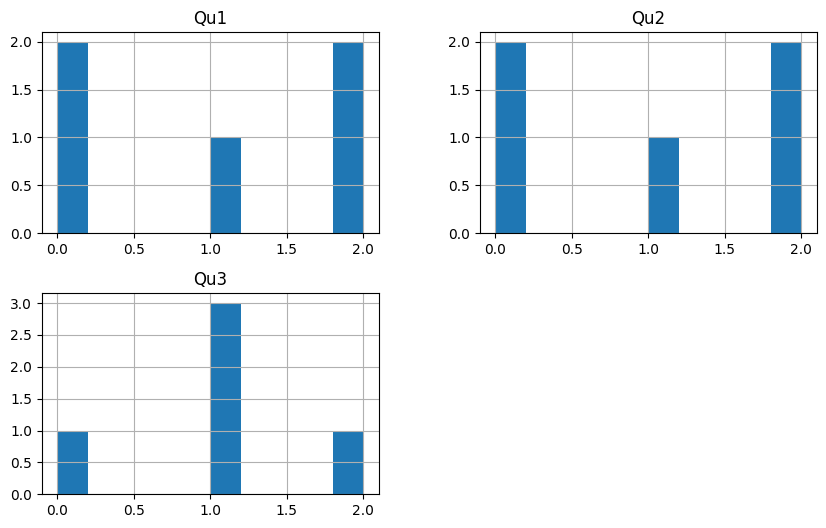

In [314]:
result.hist()

There is also a DataFrame.value_counts method, but it computes counts considering
each row of the DataFrame as a tuple to determine the number of occurrences of each
distinct row

In [ ]:
data = pd.DataFrame({"a": [1, 1, 1, 2, 2], "b": [0, 0, 1, 0, 0]})
data
data.value_counts()

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS